In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

In [168]:
#Weekly road fuel prices
Fuel = r'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/929456/CSV_261020.csv'

In [169]:
#Parse the dates in order to have Pandas recognise dates correctly
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')
                                        
df=pd.read_csv(Fuel, usecols=[0,1,2,3,5], skiprows=[0,2], parse_dates=['Weekly Prices time series'], date_parser=dateparse)

#Rename columns to shorter more comprehensive names
df.columns=["Date", "Price_Unleaded", "Price_Diesel", "Duty_rate", "VAT"]

In [170]:
df.head()

,Date,Price_Unleaded,Price_Diesel,Duty_rate,VAT
0,2003-06-09,74.59,76.77,45.82,17.5
1,2003-06-16,74.47,76.69,45.82,17.5
2,2003-06-23,74.42,76.62,45.82,17.5
3,2003-06-30,74.35,76.51,45.82,17.5
4,2003-07-07,74.28,76.46,45.82,17.5


In [171]:
df.describe()

,Price_Unleaded,Price_Diesel,Duty_rate,VAT
count,908.000000,908.000000,908.000000,908.000000
mean,111.088359,115.628943,54.519306,18.752753
std,18.318072,19.424713,4.665987,1.532897
min,74.210000,76.410000,45.820000,15.000000
25%,95.705000,99.177500,50.350000,17.500000
50%,113.720000,118.110000,57.950000,20.000000
75%,127.550000,132.600000,57.950000,20.000000
max,142.170000,148.040000,58.950000,20.000000


In [172]:
df.groupby(df['Date'].dt.year)

<AxesSubplot:title={'center':'Prices of Unleaded and Diesel Fuel from 2003 to 2020'}, xlabel='Date', ylabel='Price_Unleaded'>

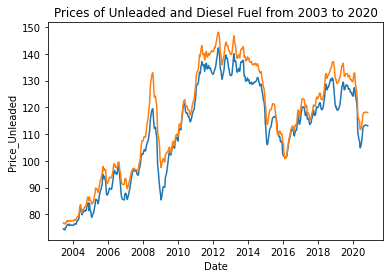

In [198]:
#show the trend of unleaded fuel prices over the course of June 2003 to Oct 2020
sns.lineplot(data=df, x="Date", y="Price_Unleaded").set_title("Prices of Unleaded and Diesel Fuel from 2003 to 2020")

#show the trend of diesel fuel prices over the course of June 2003 to Oct 2020
sns.lineplot(data=df, x='Date', y='Price_Diesel')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            908 non-null    datetime64[ns]
 1   Price_Unleaded  908 non-null    float64       
 2   Price_Diesel    908 non-null    float64       
 3   Duty_rate       908 non-null    float64       
 4   VAT             908 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 35.6 KB


In [175]:
#when did fuel prices peak
df[df.Price_Unleaded>139]

,Date,Price_Unleaded,Price_Diesel,Duty_rate,VAT
459,2012-03-26,139.48,146.56,57.95,20.0
460,2012-04-02,140.99,147.68,57.95,20.0
461,2012-04-09,141.97,148.00,57.95,20.0
462,2012-04-16,142.17,148.04,57.95,20.0
463,2012-04-23,141.76,147.96,57.95,20.0
464,2012-04-30,141.00,147.05,57.95,20.0
465,2012-05-07,140.14,146.40,57.95,20.0
484,2012-09-17,139.42,144.18,57.95,20.0
485,2012-09-24,139.54,144.36,57.95,20.0
508,2013-03-04,139.47,146.34,57.95,20.0


In [176]:
#when did fuel prices fall to its lowest
df[df.Price_Unleaded<75.5]

,Date,Price_Unleaded,Price_Diesel,Duty_rate,VAT
0,2003-06-09,74.59,76.77,45.82,17.5
1,2003-06-16,74.47,76.69,45.82,17.5
2,2003-06-23,74.42,76.62,45.82,17.5
3,2003-06-30,74.35,76.51,45.82,17.5
4,2003-07-07,74.28,76.46,45.82,17.5
5,2003-07-14,74.21,76.41,45.82,17.5
6,2003-07-21,75.07,76.90,45.82,17.5
7,2003-07-28,75.10,76.86,45.82,17.5
8,2003-08-04,75.12,76.81,45.82,17.5
9,2003-08-11,75.44,77.08,45.82,17.5
